In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_SPX = pd.read_csv('https://s3.eu-west-1.amazonaws.com/neueda.conygre.com/pydata/SPX.csv',
                     index_col='Date', parse_dates=True)

# Use the dtypes attribute to check what types are in each column
# the word 'object' is used to denote a string
print(df_SPX.dtypes)

df_SPX.head()

Price       object
Open        object
High        object
Low         object
Change %    object
dtype: object


,Price,Open,High,Low,Change %
Date,,,,,
2017-12-29,"2,673.61","2,689.15","2,692.12","2,673.61",-0.52%
2017-12-28,"2,687.54","2,686.10","2,687.66","2,682.69",0.18%
2017-12-27,"2,682.62","2,682.10","2,685.64","2,678.91",0.08%
2017-12-26,"2,680.50","2,679.09","2,682.74","2,677.96",-0.11%
2017-12-22,"2,683.34","2,684.22","2,685.35","2,678.13",-0.05%


In [3]:
df_SPX['Price']=pd.to_numeric(df_SPX['Price'].str.replace(',',''))
df_SPX['Open']=pd.to_numeric(df_SPX['Open'].str.replace(',',''))
df_SPX['High']=pd.to_numeric(df_SPX['High'].str.replace(',',''))
df_SPX['Low']=pd.to_numeric(df_SPX['Low'].str.replace(',',''))
df_SPX['Change %']=pd.to_numeric(df_SPX['Change %'].str.replace('%',''))
print(df_SPX.dtypes)
df_SPX.head()

Price       float64
Open        float64
High        float64
Low         float64
Change %    float64
dtype: object


,Price,Open,High,Low,Change %
Date,,,,,
2017-12-29,2673.61,2689.15,2692.12,2673.61,-0.52
2017-12-28,2687.54,2686.10,2687.66,2682.69,0.18
2017-12-27,2682.62,2682.10,2685.64,2678.91,0.08
2017-12-26,2680.50,2679.09,2682.74,2677.96,-0.11
2017-12-22,2683.34,2684.22,2685.35,2678.13,-0.05


In [12]:
data=df_SPX.sort_values('Date').query("Date>=2006and Date<=2017")[['High','Low']]

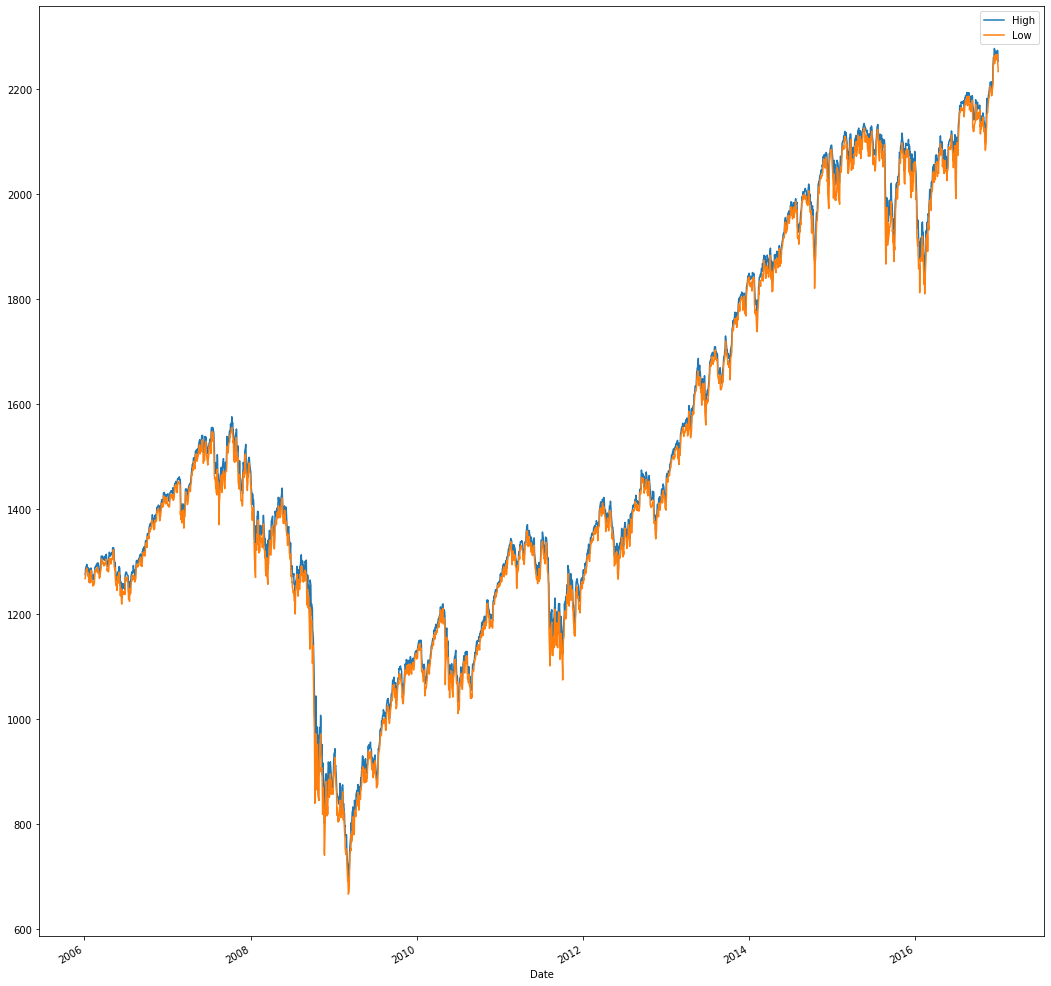

In [13]:
data.plot(figsize=(18,19))

In [14]:
byMonth=pd.Grouper(freq='BM')
funcs=['max','min','mean']
data2=data.groupby(byMonth).agg(funcs)
data2

High                            Low                      
                max      min         mean      max      min         mean
Date                                                                    
2006-01-31  1294.90  1268.19  1283.589474  1288.12  1259.42  1274.167368
2006-02-28  1297.57  1265.78  1281.536316  1289.43  1253.61  1271.135789
2006-03-31  1310.88  1278.26  1298.765217  1305.32  1268.42  1288.788696
2006-04-28  1318.16  1290.93  1307.992105  1306.59  1280.74  1296.158421
2006-05-31  1326.70  1264.53  1297.076818  1322.87  1245.34  1284.194545
...             ...      ...          ...      ...      ...          ...
2016-08-31  2193.81  2163.79  2182.671739  2186.80  2147.58  2171.063478
2016-09-30  2187.87  2141.33  2166.813333  2179.07  2119.12  2147.269048
2016-10-31  2169.60  2133.25  2151.324286  2160.39  2114.72  2137.057143
2016-11-30  2214.10  2099.07  2171.841429  2206.27  2083.79  2154.512381
2016-12-30  2277.53  2197.95  2253.583333  2266.15  2187.44  2240.177143

[132 rows x 6 columns]

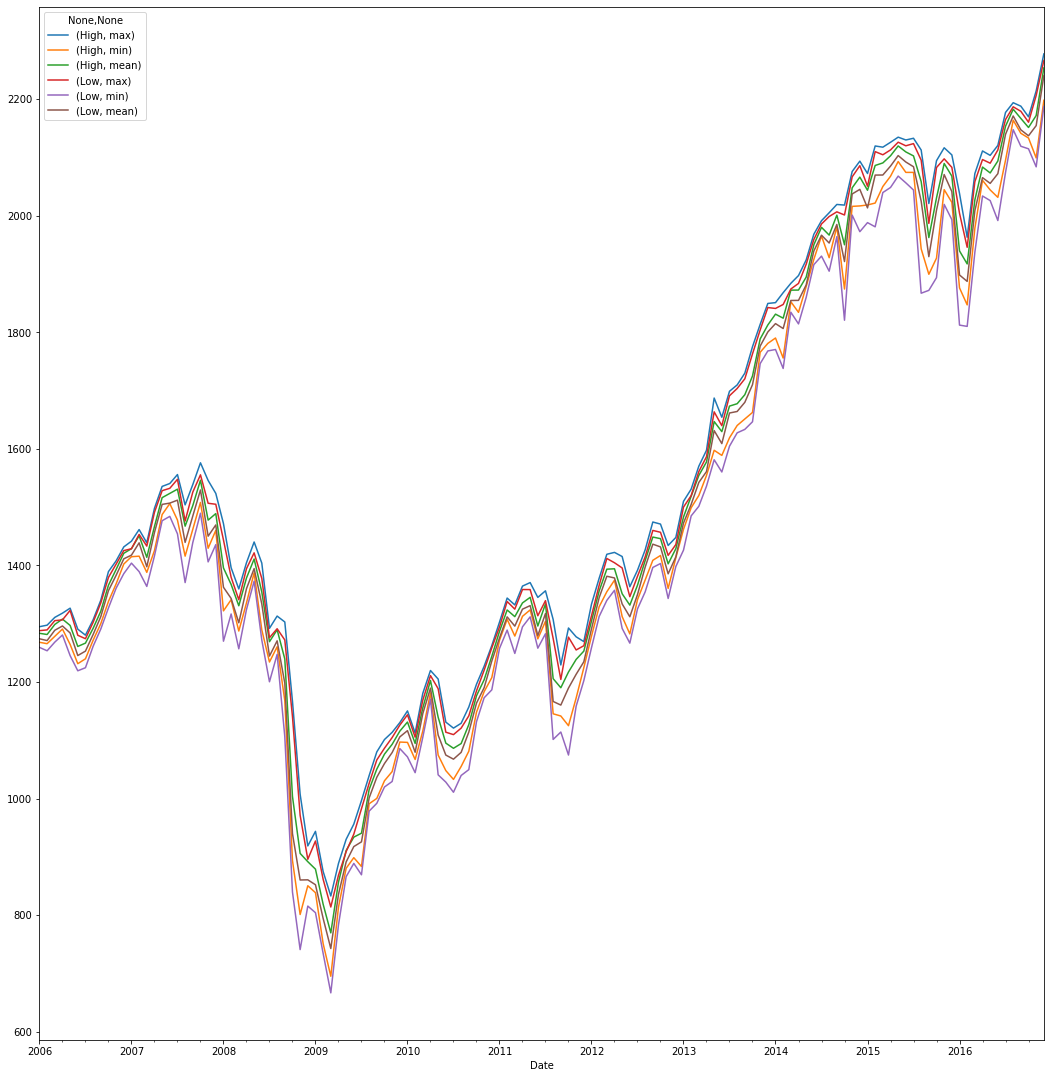

In [15]:
data2.plot(figsize=(18,19))